# 鳶尾花(Iris)品種的辨識

In [636]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [637]:
ds = datasets.load_iris()

In [638]:
import pandas as pd
df = pd.DataFrame(ds.data,columns = ds.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [639]:
y = ds.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [640]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [642]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [643]:
# 指定X，並轉為 Numpy 陣列
X = df.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [644]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [645]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [646]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [647]:
y_pred = clf.predict(X_test_std)
y_pred

array([1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 0, 0, 2,
       0, 0, 2, 1, 0, 1, 2, 2])

In [648]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [649]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]


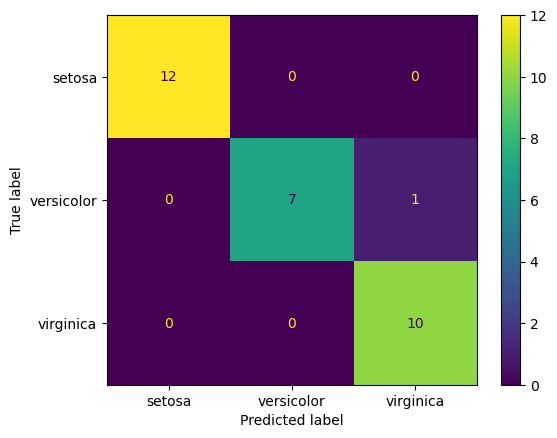

In [650]:
# 混淆矩陣圖
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=ds.target_names)
disp.plot()
plt.show()

## 非監督學習

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [661]:
X, y = datasets.load_iris(return_X_y=True)

In [662]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')

In [664]:
model.fit(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [665]:
y_pred = model.predict(X)

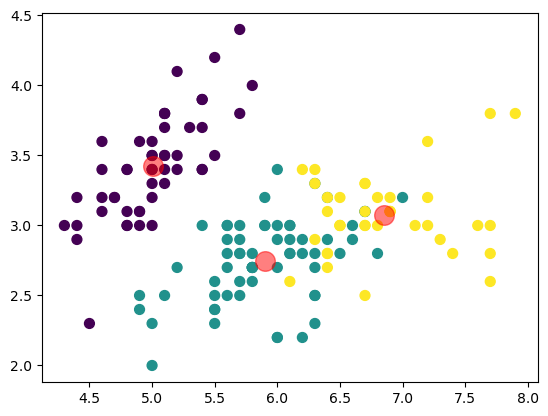

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## Numpy

In [838]:
import numpy as np
my_list = [1,2,3]
my_array = np.array(my_list,dtype=np.uint8)
print(type(my_list),my_list,type(my_array),my_array)

<class 'list'> [1, 2, 3] <class 'numpy.ndarray'> [1 2 3]


In [674]:
# https://numpy.org/doc/stable/reference/arrays.dtypes.html
my_array.dtype

dtype('int8')

In [676]:
my_matrix = [[1,2,3],[4,5,6],[7,8,9]]
my_matrix

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [681]:
marray = np.array(my_matrix)
marray

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [680]:
marray.shape

(3, 3)

In [682]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [683]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [684]:
np.arange(10,-1,-1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [ ]:
#https://numpy.org/devdocs//reference/generated/numpy.zeros.html
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [689]:
zeroArray = np.zeros((3,3))

In [697]:
np.ones(3)

array([1., 1., 1.])

In [699]:
np.ones((3,3)) *5

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

### linspace 
Return evenly spaced numbers over a specified interval. [[reference](https://www.numpy.org/devdocs/reference/generated/numpy.linspace.html)]

`np.linspace(0, 5, 20)` 背後其實有一個**等差數列的公式**。
這個函式會幫你把「0 到 5」之間，平均分成 19 段，然後給你 20 個點（包含頭尾）。

---

## 公式解釋

假設：

* 開始值是 `start`
* 結束值是 `end`
* 共要 `num` 個點

那第 `i` 個數字（`i` 從 0 開始），可以用下面的公式算：

```
value_i = start + i * (end - start) / (num - 1)
```

---

### 套用你的例子

* `start = 0`
* `end = 5`
* `num = 20`
* 所以每一段距離 = (5-0)/(20-1) = 5/19 ≈ 0.2632

每一個點的位置就是：

* 第 0 個點：0 + 0 × 0.2632 = 0
* 第 1 個點：0 + 1 × 0.2632 ≈ 0.2632
* 第 2 個點：0 + 2 × 0.2632 ≈ 0.5263
* ...
* 第 19 個點：0 + 19 × 0.2632 = 5

---

## 結論

* **公式**：`value_i = start + i * (end - start) / (num - 1)`
* **等差數列**：彼此間距離一樣
* **頭尾一定有包含**

---

In [700]:
np.linspace(0,10,3)

array([ 0.,  5., 10.])

In [702]:
np.linspace(0,5,20)

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [ ]:
np.eye(5)#I

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [707]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

## Random 
NumPy也有許多方法來創建隨機數陣列：

### rand
創建一個給定形狀的陣列，並用來自於[0, 1)的均勻分布的隨機樣本填充它。[[參考資料](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.rand.html)]

In [709]:
np.random.rand(10)

array([0.61666367, 0.40348771, 0.40647124, 0.19344458, 0.21390721,
       0.77576704, 0.7051204 , 0.47486349, 0.40000724, 0.52616849])

In [714]:
np.random.rand(5,5)

array([[0.18811468, 0.88236997, 0.34682929, 0.71565847, 0.49304615],
       [0.63707058, 0.95442467, 0.91697173, 0.44291798, 0.14501011],
       [0.69272946, 0.42614302, 0.01147681, 0.93177912, 0.20689691],
       [0.85789616, 0.34906285, 0.5743798 , 0.85564378, 0.13976769],
       [0.27486087, 0.80067632, 0.01335584, 0.29138655, 0.3844796 ]])

### randn

從“標準正態”分佈[σ = 1]返回樣本（或樣本）。與 **rand** 不同，靠近零的值更有可能出現。[[參考資料](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randn.html)]


標準正態分佈是一種特殊的常態分佈，其平均數（μ）為0，標準差（σ）為1。在標準正態分佈中，數據點主要集中在平均值附近，並且隨著距離平均值的增加而呈指數下降。這種分佈的曲線形狀呈鐘形，並且在平均值附近有一個尖峰。

在機器學習和統計學中，標準正態分佈通常用於建模和分析，並且在許多算法和技術中被廣泛應用。

In [715]:
nNp = np.random.randn(5)
nNp

array([-1.33414243,  1.18907839,  0.20243251, -0.29882044, -0.76374555])

In [716]:
print("mean:",nNp.mean())
print("std:",nNp.std())

mean: -0.20103950613603444
std: 0.8608529343394824


In [719]:
nNp = np.random.randn(1000)
print("mean:",nNp.mean())
print("std:",nNp.std())

mean: 0.02310750972082419
std: 1.0075843048094422


### randint
從`low`（包含）到`high`（不包含）返回隨機整數。 [[參考資料](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)]

In [746]:
np.random.randint(1,100)

12

In [804]:
np.random.randint(1,100,10)

array([61, 17, 65, 60, 62, 43, 40, 50, 15, 50])

In [ ]:
v2 = np.random.choice(range(1,101),10,replace=False)
v2#replace=False 不重複抽 預設複抽

array([69, 70, 76,  3, 66, 45, 81, 36, 56,  4])

In [797]:
arr = np.arange(1,100)
np.random.shuffle(arr)
arr

array([60, 77, 16, 40, 59, 75, 64, 17, 31, 84, 23, 37, 72, 25, 10, 49, 15,
       13, 19, 36, 79, 42, 21, 82, 14, 86,  8, 28, 56, 18, 33,  3, 48, 41,
       97, 81,  7, 95, 30,  2,  4, 69, 50, 80,  5, 96, 89, 45, 66, 12,  1,
       20, 68, 93, 74, 51, 24, 73,  6, 94, 76, 90, 91, 70, 44, 22, 63, 67,
       35, 55, 88, 43, 32, 11, 99, 62, 85, 47, 53, 27, 71, 58, 34, 92, 52,
       87, 46, 54, 26, 83, 65,  9, 39, 57, 98, 29, 38, 61, 78])

In [822]:
np.random.seed(42)
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [833]:
arra = np.arange(25)
ranarr = np.random.randint(0,50,10)

In [834]:
ranarr

array([43, 24, 48, 26, 41, 27, 15, 14, 46, 43])

In [835]:
ranarr.shape

(10,)

In [836]:
arra.shape

(25,)

In [849]:
arra.reshape(5,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [848]:
arr2 = np.resize(ranarr,(5,5))
arr2

array([[43, 24, 48, 26, 41],
       [27, 15, 14, 46, 43],
       [43, 24, 48, 26, 41],
       [27, 15, 14, 46, 43],
       [43, 24, 48, 26, 41]])